In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [2]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

1


In [5]:
training_data = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
).flow_from_directory(
    directory="Skin_Cancer_data/train",
    class_mode="categorical",
    batch_size=10,
    target_size=(224, 224)
)

test_data = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
).flow_from_directory(
    directory="Skin_Cancer_data/test",
    class_mode="categorical",
    batch_size=10,
    target_size=(224, 224)
)

validate_data = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
).flow_from_directory(
    directory="Skin_Cancer_data/validate",
    class_mode="categorical",
    batch_size=10,
    target_size=(224, 224)
)



Found 7007 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.
Found 1504 images belonging to 7 classes.


In [9]:
assert training_data.n == 7007
assert test_data.n == 1503
assert validate_data.n == 1504
assert training_data.num_classes == test_data.num_classes == validate_data.num_classes == 7

In [10]:
train_images, train_labels  = next(training_data)
print(train_images.shape,train_labels.shape)

(10, 224, 224, 3) (10, 7)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

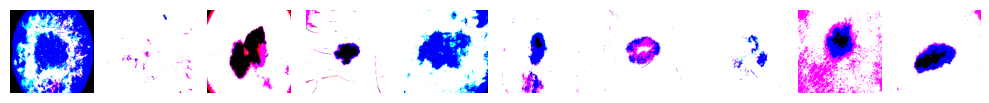

[[0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [17]:
def plotImages(image_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

plotImages(train_images)
print(train_labels)

In [20]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 112, 112, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)       

In [21]:
model.compile(
   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
   loss="categorical_crossentropy",
   metrics=['accuracy']
)

In [32]:
model.fit(
       training_data_generator,
       # steps_per_epoch=training_data_generator.samples/16,
       epochs=5,
       validation_data=validation_data_generator,
       # validation_steps=validation_data_generator.samples/16,
       verbose=2
)



Epoch 1/5


2023-10-13 23:06:45.549509: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7389132002512662716
2023-10-13 23:06:45.549531: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 7846949612330269245


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/runpy.py", line 87, in _run_code

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/9x/cs853x_d2wbc406dgwylbf500000gn/T/ipykernel_2389/3107329853.py", line 1, in <module>

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1742, in fit

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1081, in train_step

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1139, in compute_loss

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/losses.py", line 142, in __call__

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/losses.py", line 268, in call

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/backend.py", line 5566, in categorical_crossentropy

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/runpy.py", line 87, in _run_code

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/9x/cs853x_d2wbc406dgwylbf500000gn/T/ipykernel_2389/3107329853.py", line 1, in <module>

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1742, in fit

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1081, in train_step

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py", line 1139, in compute_loss

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/losses.py", line 142, in __call__

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/losses.py", line 268, in call

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy

  File "/Users/sundar/miniforge3/envs/myenv/lib/python3.9/site-packages/keras/src/backend.py", line 5566, in categorical_crossentropy

2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[16,2] labels_size=[16,7]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
	 [[sequential_1/dense_1/Softmax/_20]]
  (1) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[16,2] labels_size=[16,7]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1671]